# Predicting Heart Disease

## By: Ayush Trivedi

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import graphviz

C:\Users\ayush\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Data Analysis

In [2]:
df = pd.read_csv(r'C:\Users\ayush\Downloads\Python Projects\Predicting heart Disease\dataset.csv')

In [3]:
print("Dataset Info:")
print(df.info())
print("\nDataset Description:")
print(df.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None

Dataset Description:
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.36633

In [4]:
corr_matrix = df.corr()
print("\nCorrelation Matrix:")
print(corr_matrix)


Correlation Matrix:
               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trestbps  0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalach  -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exang     0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slope    -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
ca        0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thal      0.068001  0.210041 -0.161736  0.0

### Data Visualiztion

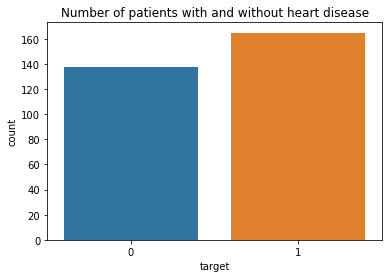

In [5]:
sns.countplot(x='target', data=df)
plt.title("Number of patients with and without heart disease")
plt.show()

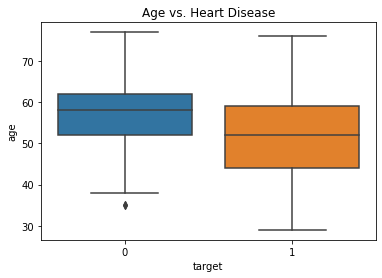

In [6]:
sns.boxplot(x='target', y='age', data=df)
plt.title("Age vs. Heart Disease")
plt.show()

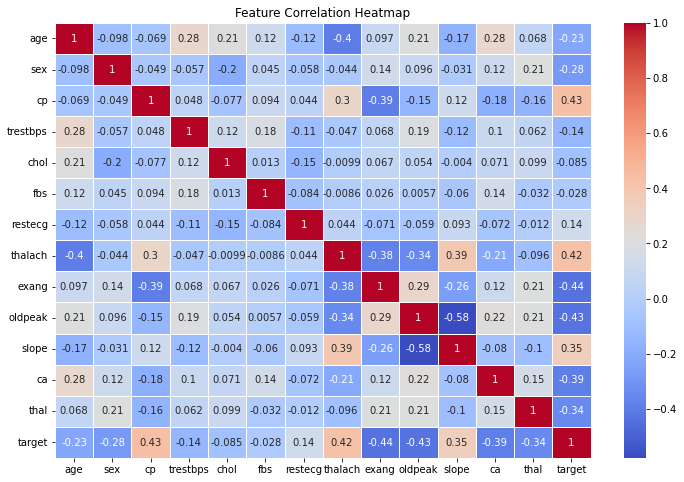

In [7]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

### Logistic Regression

In [8]:
y = df['target']
X = df.drop(columns=['target'])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
print("\nLogistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log))
print("\nLogistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))


Logistic Regression Confusion Matrix:
[[32  9]
 [ 8 42]]

Logistic Regression Accuracy: 0.8131868131868132


C:\Users\ayush\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Decision Tree

In [11]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print("\nDecision Tree Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))
print("\nDecision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))


Decision Tree Confusion Matrix:
[[33  8]
 [15 35]]

Decision Tree Accuracy: 0.7472527472527473


In [18]:
import os
os.environ["PATH"] += os.pathsep + r"C:\Program Files (x86)\Graphviz-12.2.1-win64\bin"

In [19]:
dot_data = export_graphviz(dt_model, out_file=None, feature_names=X.columns, filled=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree")


'decision_tree.pdf'

### Random Forest

In [20]:
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("\nRandom Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nRandom Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Confusion Matrix:
[[32  9]
 [10 40]]

Random Forest Accuracy: 0.7912087912087912


In [21]:
dot_data_rf = export_graphviz(rf_model.estimators_[0], out_file=None, feature_names=X.columns, filled=True)
graph_rf = graphviz.Source(dot_data_rf)
graph_rf.render("random_forest")

'random_forest.pdf'

### Selecting the Best Model

In [22]:
print("\nClassification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_log))


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



In [23]:
print("\nClassification Report for Decision Tree:")
print(classification_report(y_test, y_pred_dt))


Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.69      0.80      0.74        41
           1       0.81      0.70      0.75        50

    accuracy                           0.75        91
   macro avg       0.75      0.75      0.75        91
weighted avg       0.76      0.75      0.75        91



In [24]:
print("\nClassification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.76      0.78      0.77        41
           1       0.82      0.80      0.81        50

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.79      0.79      0.79        91



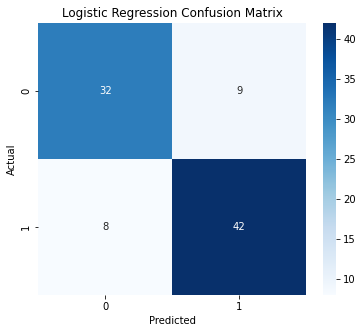

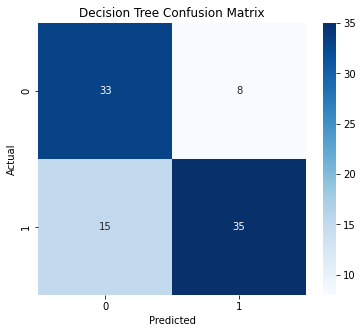

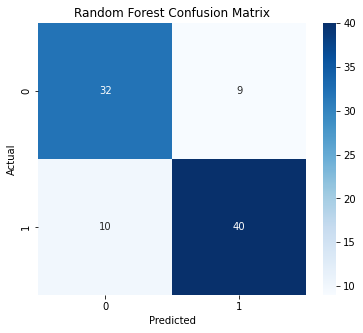

In [25]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

plot_confusion_matrix(y_test, y_pred_log, "Logistic Regression Confusion Matrix")
plot_confusion_matrix(y_test, y_pred_dt, "Decision Tree Confusion Matrix")
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest Confusion Matrix")

In [26]:
accuracies = {
    "Logistic Regression": accuracy_score(y_test, y_pred_log),
    "Decision Tree": accuracy_score(y_test, y_pred_dt),
    "Random Forest": accuracy_score(y_test, y_pred_rf)
}

best_model = max(accuracies, key=accuracies.get)
print(f"\nBest performing model: {best_model} with accuracy {accuracies[best_model]:.2f}")


Best performing model: Logistic Regression with accuracy 0.81
